In [30]:
#pip install reportlab
import json
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import itertools
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
with open('dataset.json', 'r') as file:
    data = json.load(file)

print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
len(data)

16455

In [14]:
# look at json
data[0]['cuisines'][0]['label']

'Greek'

In [16]:
# extract images of one restaurant
one_restaurant_info=data[0]['more_details']['full_images']
one_restaurant_images=[i['image_id'] for i in one_restaurant_info]
one_restaurant_images

['2088757', '2182000', '4151606', '4151588', '2224983']

In [25]:
# do this for all restaurants

res_image_dic={}
cuisine_dic={}
for res in data:
    # use cuisine type as restaurant 
    res_id= res['identifier']
    one_restaurant_info=res['more_details']['full_images']
    one_restaurant_images=[i['image_id'] for i in one_restaurant_info]
    res_image_dic[res_id]=one_restaurant_images
    cuisine_dic[res_id] = res['cuisines'][0]['label']#

In [44]:
df_cuisine=pd.DataFrame.from_dict(cuisine_dic, orient='index').reset_index()
df_cuisine.columns=['res_id', 'cuisine']
df_cuisine.groupby('cuisine').count().sort_values(by='res_id',ascending=False).iloc[:20]
# get the country names from top 20

,res_id
cuisine,
Modern Cuisine,3307
Traditional Cuisine,1047
Creative,993
Contemporary,646
Japanese,635
Seafood,623
Italian,616
Classic Cuisine,435
Market Cuisine,409


In [53]:
top_12 = list(df_cuisine.groupby('cuisine').count().sort_values(by='res_id',ascending=False).iloc[:20].reset_index()['cuisine'])
top_12 

['Modern Cuisine',
 'Traditional Cuisine',
 'Creative',
 'Contemporary',
 'Japanese',
 'Seafood',
 'Italian',
 'Classic Cuisine',
 'Market Cuisine',
 'Country cooking',
 'French',
 'Mediterranean Cuisine',
 'Modern British',
 'Street Food',
 'International',
 'Modern French',
 'Regional Cuisine',
 'Cantonese',
 'Thai',
 'Chinese']

In [58]:
extract_relevant_id = list(df_cuisine[df_cuisine['cuisine'].isin(top_12)]['res_id'])

In [60]:
res_image_dic=dict((k, res_image_dic[k]) for k in extract_relevant_id if k in res_image_dic)

In [62]:
# list of all restaurant images
nested_list=list(res_image_dic.values())
image_names = list(itertools.chain(*nested_list))
#image_names

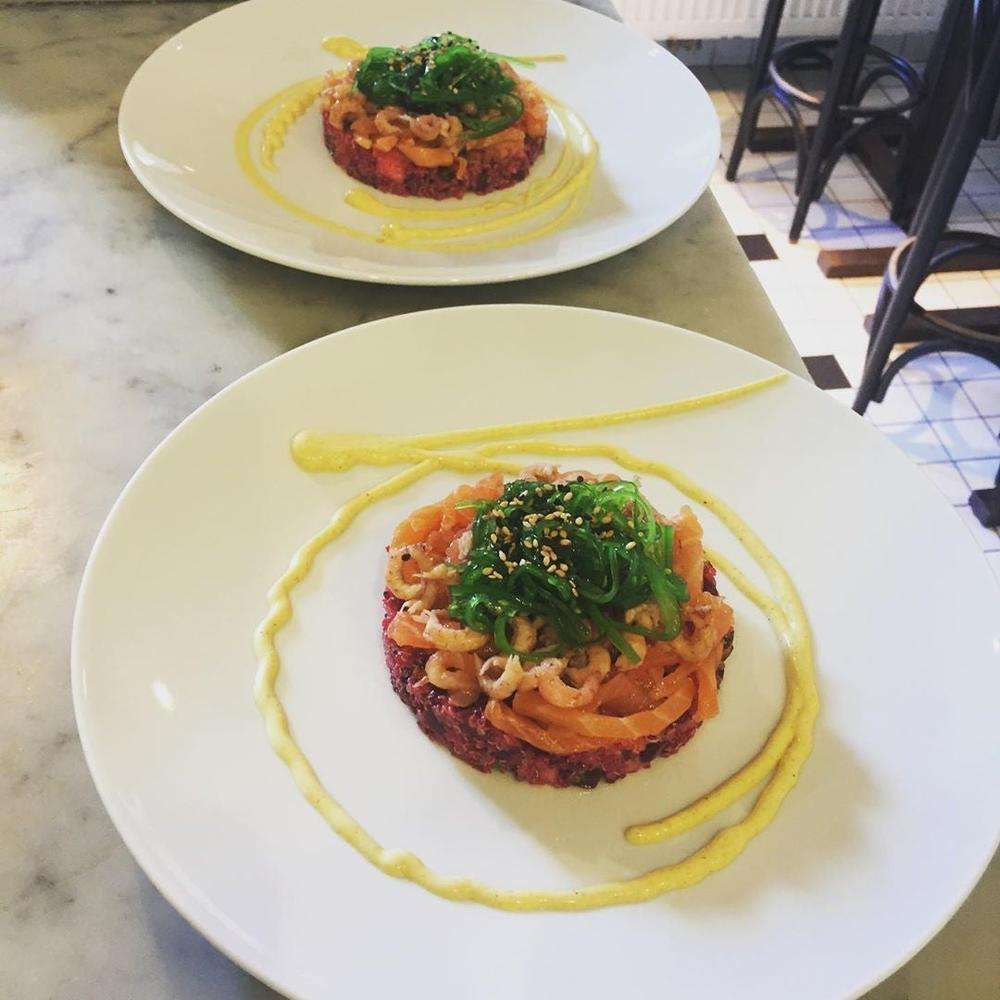

In [65]:
# test reading an image
folder_path = 'images'
image_path=folder_path + '/' + image_names[0] + '.jpg'
img=Image.open(image_path)
img

In [ ]:
# reading all images in the top 12 cuisine types
all_images={}
folder_path = 'images'
target_size = (256, 256) # need to resize because some images do not have the same shap

for name in image_names:
    iteration+=1
    file_name=name + '.jpg'
    image_path = folder_path + '/' + file_name
    try:
        with Image.open(image_path) as img:
            img = img.resize(target_size)
            image_array = np.array(img)

            all_images[name]=image_array
            #print(name)
    except:
        print(f"Error opening file '{file_name}', skipping...")
        continue

Error opening file '4215425.jpg', skipping...


In [ ]:
len(all_images) # how many images for our top 12 cuisines

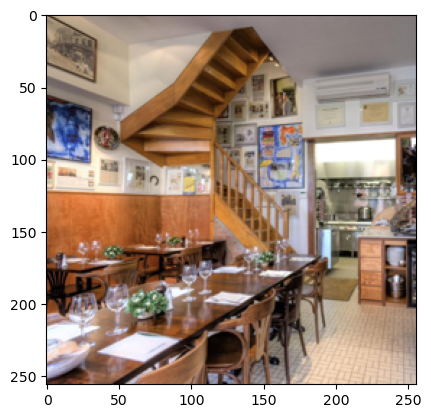

In [68]:
# plot one image based on id (some images are interior, need to filter food only images)
plt.imshow(all_images[image_names[1]], cmap='gray')
plt.show()

# Filter only food images (or just use the labelled one from Raisa)

# Classify the cuisine types  